
## Time-Dependent Reformulation

Consider now the PDE

$$
\frac{\partial}{\partial t}u - \Delta v - \Delta u + u = f,
$$

with auxiliary relation

$$
v + \Delta u = 0.
$$

---

### Manufactured Solution

Let the exact solution be

$$
u(x,t) = e^{ct} \cos(\pi x),
$$

where

$$
c = \pi^4 + \pi^2 + 1.
$$

Then

$$
\frac{\partial u}{\partial t} = c e^{ct}\cos(\pi x),
$$

$$
\Delta u = -\pi^2 e^{ct} \cos(\pi x),
$$

$$
\Delta^2 u = \pi^4 e^{ct}\cos(\pi x).
$$

Thus the source term is

$$
f = (\pi^4 + \pi^2 + 1) e^{ct} \cos(\pi x).
$$

---

## Weak Form of Time-Discrete System

Let superscript \( n \) denote time level \( t^n \).  
Backward Euler gives

$$
\frac{u^{n} - u^{n-1}}{\Delta t}
-
\Delta v^{n}
-
\Delta u^{n}
+
u^{n}
= f^{n}.
$$

The auxiliary equation:

$$
v^{n} + \Delta u^{n} = 0.
$$

---

### Weak Form

Multiply by test function \( \phi_j \):

$$
\left( \frac{u^{n}}{\Delta t}, \phi_j \right)
-
(\Delta v^{n}, \phi_j)
-
(\Delta u^{n}, \phi_j)
+
(u^{n}, \phi_j)
=
\left( f^{n} + \frac{u^{n-1}}{\Delta t}, \phi_j \right).
$$

Use integration by parts:

$$
\left( \frac{u^{n}}{\Delta t}, \phi_j \right)
+
(\nabla v^{n}, \nabla \phi_j)
-
(\nabla u^{n}, \nabla \phi_j)
+
(u^{n}, \phi_j)
=
\left( f^{n} + \frac{u^{n-1}}{\Delta t}, \phi_j \right).
$$

The auxiliary weak equation:

$$
(v^{n}, \phi_j) + (\Delta u^{n}, \phi_j) = 0
\quad\Rightarrow\quad
(v^{n}, \phi_j) - (\nabla u^{n}, \nabla \phi_j) = 0.
$$

---

## Final Semi-Discrete Matrix Form

Let

$$
K_{ij} = (\nabla \phi_i, \nabla \phi_j), 
\qquad 
M_{ij} = (\phi_i, \phi_j).
$$

The full system becomes

$$
\begin{bmatrix}
M + \Delta t \,(K + M) & -\Delta t\,K \\
-K & M
\end{bmatrix}
\begin{bmatrix}
\alpha^{n} \\
b^{n}
\end{bmatrix}
=
\begin{bmatrix}
\Delta t\, (f^{n}, \phi_j) + (u^{n-1}, \phi_j) \\
0
\end{bmatrix}.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def MK(n):
    x = np.linspace(0,1,n)
    h = x[1]-x[0]
    
    M = np.zeros((n,n))
    K = np.zeros((n,n))
    
    
    M[0,0:2] = np.array([2,1])
    M[-1,:] = M[0,::-1]
    
    K[0,0:2] = np.array([1,-1])
    K[-1,:] = K[0,::-1]
    
    for i in range(1,n-1):
        M[i,i-1:i+2] = np.array([1,4,1])
        K[i,i-1:i+2] = np.array([-1,2,-1])
    
    return (h/6)*M , (1/h)*K 

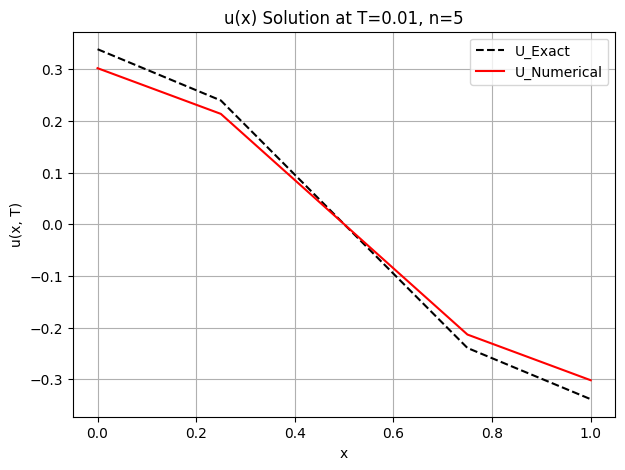

/var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/ipykernel_17571/2763555212.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, v_e, 'k--', label='v_Exact',color = "purple")
/var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/ipykernel_17571/2763555212.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, v_solve, 'r-', label='v_Numerical', color="blue")


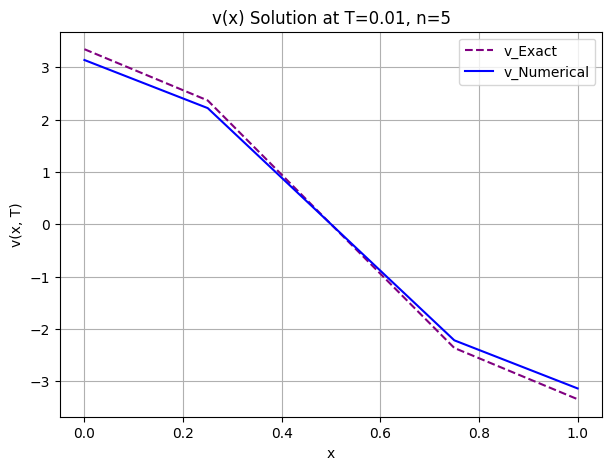

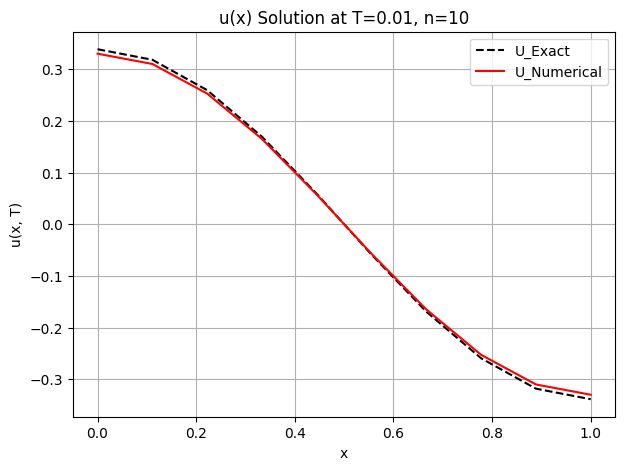

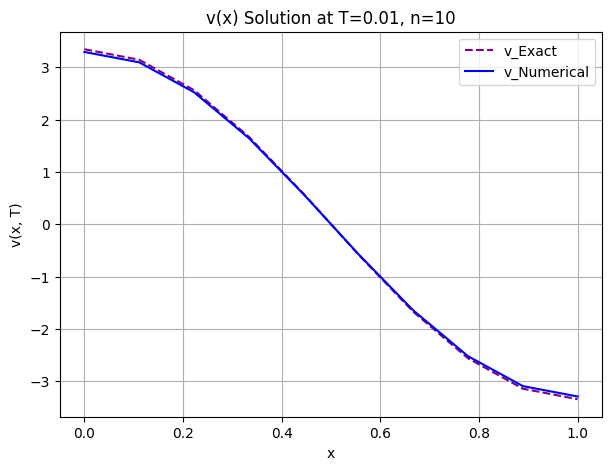

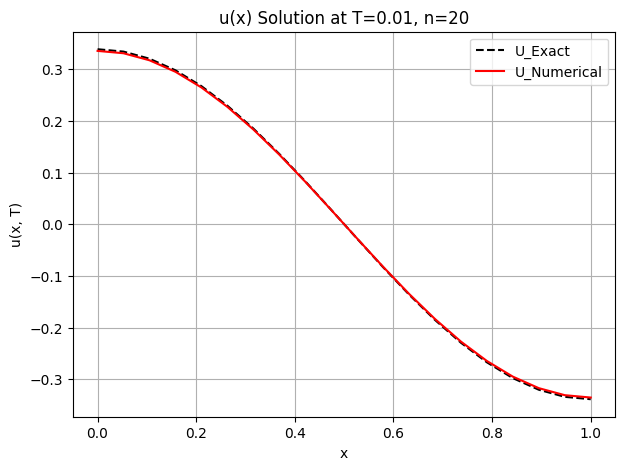

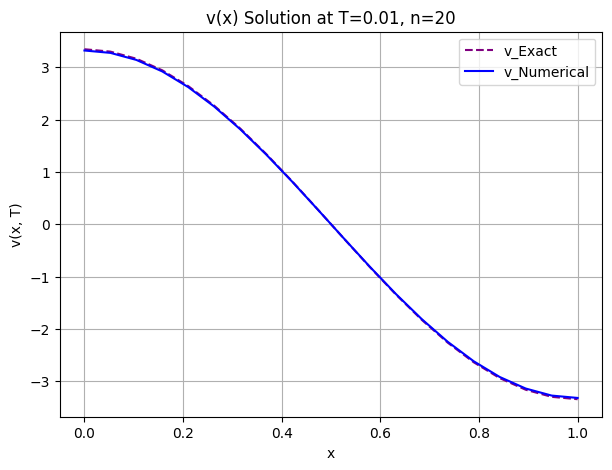

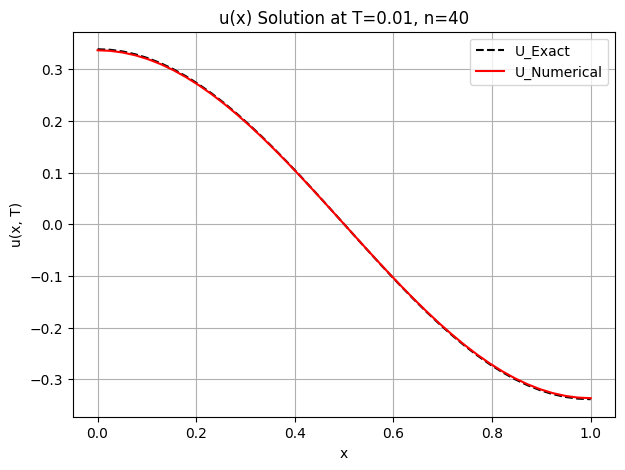

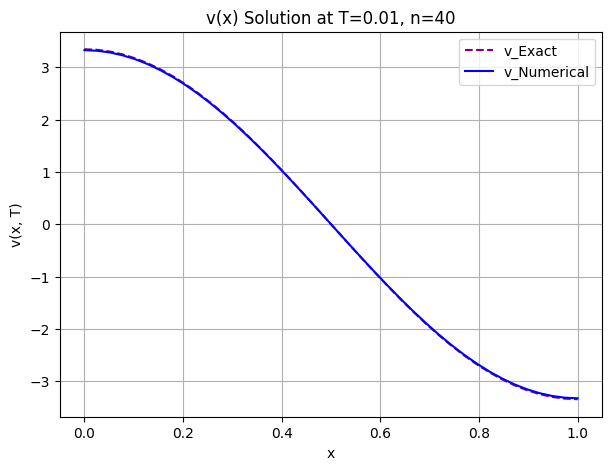

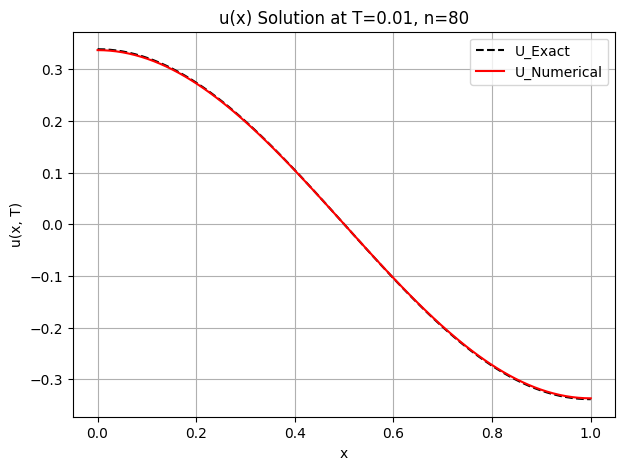

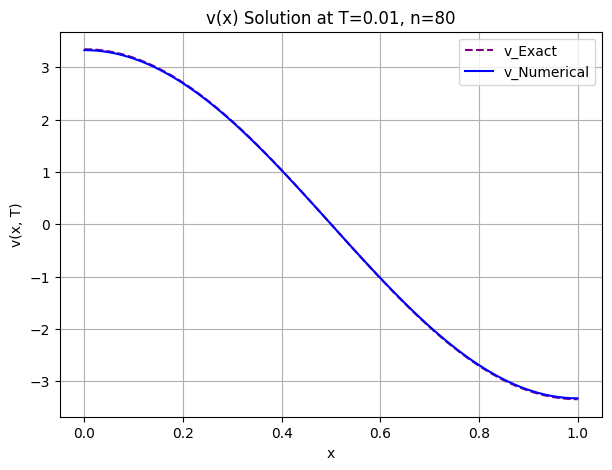

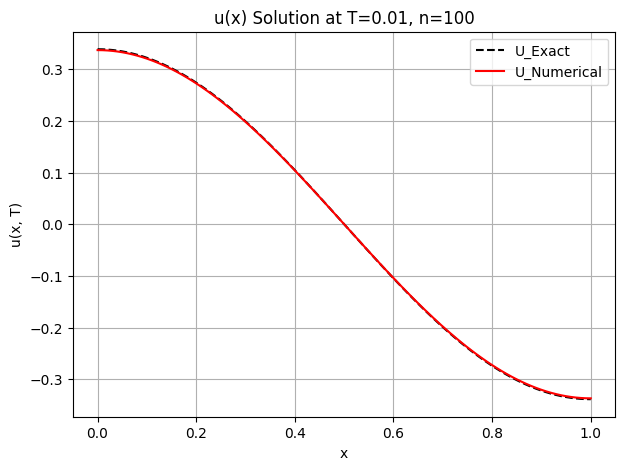

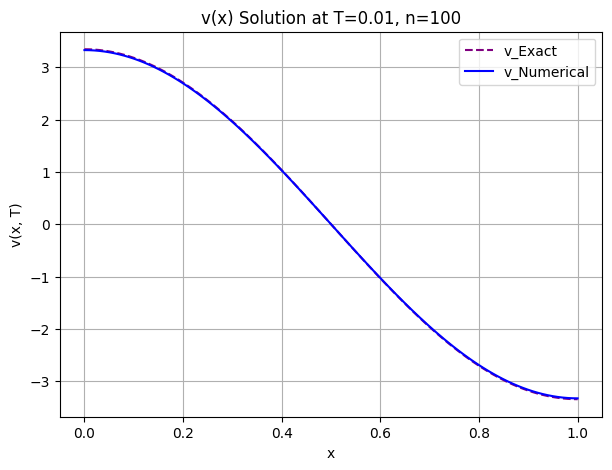

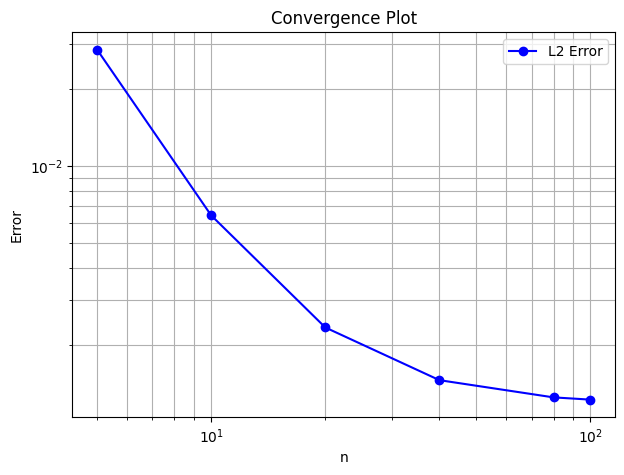

In [4]:


pi = np.pi
steps = [5,10,20,40,80,100]
dt = 0.0001
T = 0.01
c = (pi**4 + pi**2 + 1)

errors = []
solutions = []



for n in steps:
    M, K = MK(n)
    x = np.linspace(0, 1, n)
    t = 0  
    u_0 = np.exp(-c*t)*np.cos(pi*x)
    
    while t <= T:
        z = np.zeros(n)
        u_e = np.exp(-c*t)*np.cos(pi*x)
        v_e = (pi**2)*np.exp(-c*t)*np.cos(pi*x)
        f = np.zeros(n)
        F = M@f + (1/dt)*(M@u_0)
        f_force = np.hstack((z, F))
        
        A_00 = M
        A_01 = -K
        A_10 = K
        A_11 = K + (1+1/dt)*M
        
        A = np.block([[A_00, A_01],
                      [A_10, A_11]])
        
        linear_solve = np.linalg.solve(A, f_force)
        v_solve = linear_solve[:n]
        u_solve = linear_solve[n:]
        
        u_0 = u_solve
        t += dt

    error = np.linalg.norm(u_solve - u_e, 2)/np.sqrt(n)
    errors.append(error)
    solutions.append((x, u_solve, u_e,v_solve,v_e))
i = 0

for x, u_solve, u_e,v_solve,v_e in solutions:
# Plot final solution for ux

    plt.figure(figsize=(7,5))
    plt.plot(x, u_e, 'k--', label='U_Exact')
    plt.plot(x, u_solve, 'r-', label='U_Numerical')
    plt.legend()
    plt.title(f'u(x) Solution at T={T}, n={steps[i]}')
    plt.xlabel("x")
    plt.ylabel("u(x, T)")
    plt.grid(True)
    plt.show()
    
    #  plot final solution for v
    plt.figure(figsize=(7,5))
    plt.plot(x, v_e, 'k--', label='v_Exact',color = "purple")
    plt.plot(x, v_solve, 'r-', label='v_Numerical', color="blue")
    plt.legend()
    plt.title(f'v(x) Solution at T={T}, n={steps[i]}')
    plt.xlabel("x")
    plt.ylabel("v(x, T)")
    plt.grid(True)
    plt.show()
    i+=1

# Plot error convergence
plt.figure(figsize=(7,5))
plt.loglog(steps, errors, 'bo-', label='L2 Error')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Convergence Plot')
plt.grid(True, which='both')
plt.legend()
plt.show()


In [5]:
E1 = errors[0]
E2 = errors[1]
h1 = steps[0]
h2 = steps[1]

order_accuracy = np.log(E1 / E2) // np.log(h1 / h2)
print("Order of Accuracy:", abs(order_accuracy))

Order of Accuracy: 3.0
